<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/ggplot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic:** R Lang

**Title:** Data Analysis on R (with ggplot2)

**Author:** Luiz Barboza

**Date:** 20/dec/22

**Lang:** R

**Site:** https://quant-research.group/

**Email:** contato@quant-research.group

In [ ]:
!pip uninstall rpy2 -y

In [ ]:
!pip install rpy2==3.0.0

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("dplyr",repos = "http://cran.us.r-project.org")
install.packages("ggplot2",repos = "http://cran.us.r-project.org")
install.packages("readr",repos = "http://cran.us.r-project.org")
library(readr)
library(dplyr)
library(ggplot2) 

In [9]:
%%R
grades<-read_csv("https://raw.githubusercontent.com/lcbjrrr/data/main/grades%20-%20okk.csv")
print(grades)


Delimiter: ","
chr (3): Course, Student, Score
dbl (4): AP1, AP2, AP3, Grade

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



# A tibble: 12 × 7
   Course Student   AP1   AP2   AP3 Grade Score
   <chr>  <chr>   <dbl> <dbl> <dbl> <dbl> <chr>
 1 ADM    João      9     8     9     8.6 B    
 2 ADM    Maria     6     4    10     6   D    
 3 LAW    José      4     3     4     3.6 F    
 4 LAW    Pedro     8    10     7     8.6 B    
 5 ECO    Paulo     7.5   8     9.5   8.1 B    
 6 LAW    Esther    6     4.5   6     5.4 D    
 7 ADM    Gabriel   8     6     8     7.2 B    
 8 LAW    Rafael    7.5  10     9.5   8.9 B    
 9 ECO    Davi      6    10     7     7.8 B    
10 LAW    Silvio   10     9.5   9.5   9.7 A    
11 ADM    Sofia     8     7     6     7.2 B    
12 ADM    Raquel    4.5   4     4     4.2 F    


In [12]:
%%R
filter(grades, Grade>7)

# A tibble: 8 × 7
  Course Student   AP1   AP2   AP3 Grade Score
  <chr>  <chr>   <dbl> <dbl> <dbl> <dbl> <chr>
1 ADM    João      9     8     9     8.6 B    
2 LAW    Pedro     8    10     7     8.6 B    
3 ECO    Paulo     7.5   8     9.5   8.1 B    
4 ADM    Gabriel   8     6     8     7.2 B    
5 LAW    Rafael    7.5  10     9.5   8.9 B    
6 ECO    Davi      6    10     7     7.8 B    
7 LAW    Silvio   10     9.5   9.5   9.7 A    
8 ADM    Sofia     8     7     6     7.2 B    


In [13]:
%%R
select(grades,Student)

# A tibble: 12 × 1
   Student
   <chr>  
 1 João   
 2 Maria  
 3 José   
 4 Pedro  
 5 Paulo  
 6 Esther 
 7 Gabriel
 8 Rafael 
 9 Davi   
10 Silvio 
11 Sofia  
12 Raquel 


In [14]:
%%R
select(filter(grades, Grade>7),Student)

# A tibble: 8 × 1
  Student
  <chr>  
1 João   
2 Pedro  
3 Paulo  
4 Gabriel
5 Rafael 
6 Davi   
7 Silvio 
8 Sofia  


In [15]:
%%R
grades %>% filter( Grade>7) %>% select(Student)

# A tibble: 8 × 1
  Student
  <chr>  
1 João   
2 Pedro  
3 Paulo  
4 Gabriel
5 Rafael 
6 Davi   
7 Silvio 
8 Sofia  


In [16]:
%%R
approved_students <- grades %>% filter( Grade>7) %>% select(Student)
approved_students

# A tibble: 8 × 1
  Student
  <chr>  
1 João   
2 Pedro  
3 Paulo  
4 Gabriel
5 Rafael 
6 Davi   
7 Silvio 
8 Sofia  


In [17]:
%%R 
avg_per_course <- grades %>% group_by(Course) %>% summarize(avg = mean(Grade))
avg_per_course 

# A tibble: 3 × 2
  Course   avg
  <chr>  <dbl>
1 ADM     6.64
2 ECO     7.95
3 LAW     7.24


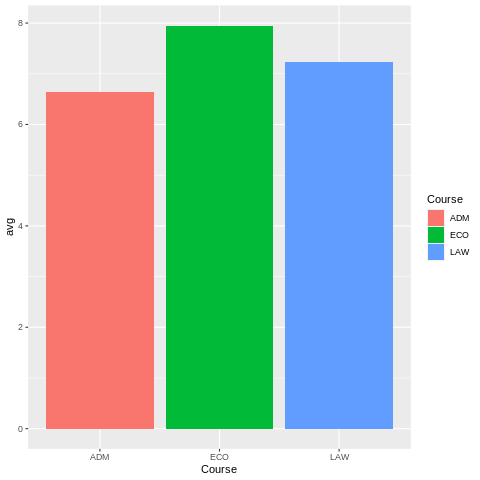

In [18]:
%%R
ggplot(data=avg_per_course,aes(x=Course,y=avg,fill=Course)) + geom_bar(stat='identity')

In [19]:
%%R
utilities <- read_csv('https://raw.githubusercontent.com/lcbjrrr/data/main/utilities%20-%20ok.csv')
utilities


Delimiter: ","
chr (1): month
dbl (5): water, energy, telco, mng, supply

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



# A tibble: 12 × 6
   month water energy telco   mng supply
   <chr> <dbl>  <dbl> <dbl> <dbl>  <dbl>
 1 jan      50    450  154.   980  1340 
 2 feb      55    425  138    980  2450 
 3 mar      60    400  120    980  1790.
 4 apr      65    375   43    980  2133.
 5 may      70    350  154.   980  1340 
 6 jun      75    325  138    980  2450 
 7 jul      80    300  120    980  1790.
 8 aug      85    275   43    980  2133.
 9 sep      90    250  154.   980  1340 
10 oct      95    225  138    980  2450 
11 nov     100    200  120    980  1790.
12 dec     105    175   43    980  2133.


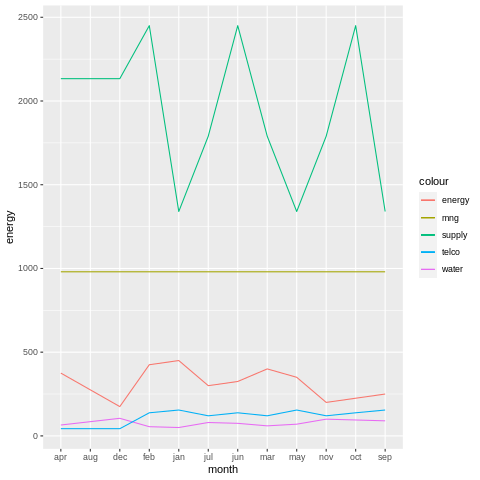

In [21]:
%%R
ggplot(data=utilities,aes(x=month, group = 1) ) +
  geom_line(aes(y=energy,color='energy')) +
  geom_line(aes(y=water,color='water')) +
  geom_line(aes(y=telco,color='telco')) +
  geom_line(aes(y=mng,color='mng')) +
  geom_line(aes(y=supply,color='supply'))  

In [22]:
%%R
util_melt <- read_csv('https://raw.githubusercontent.com/lcbjrrr/data/main/utilities%20-%20melt.csv')
util_melt


Delimiter: ","
chr (2): category, month
dbl (1): values

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



# A tibble: 60 × 3
   category month values
   <chr>    <chr>  <dbl>
 1 water    jan       50
 2 water    feb       55
 3 water    mar       60
 4 water    apr       65
 5 water    may       70
 6 water    jun       75
 7 water    jul       80
 8 water    aug       85
 9 water    sep       90
10 water    oct       95
# … with 50 more rows


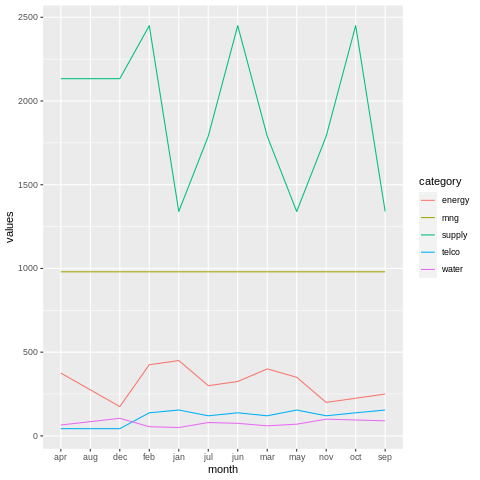

In [23]:
%%R
ggplot(data=util_melt,aes(x=month, y=values, group=category, color = category) ) +
  geom_line() 

In [ ]:
%%R
install.packages("reshape2",repos = "http://cran.us.r-project.org")
library(reshape2)

In [28]:
%%R
utility_m <- utilities %>% melt(id="month", value.name="values")
head(utility_m,6)

  month variable values
1   jan    water     50
2   feb    water     55
3   mar    water     60
4   apr    water     65
5   may    water     70
6   jun    water     75


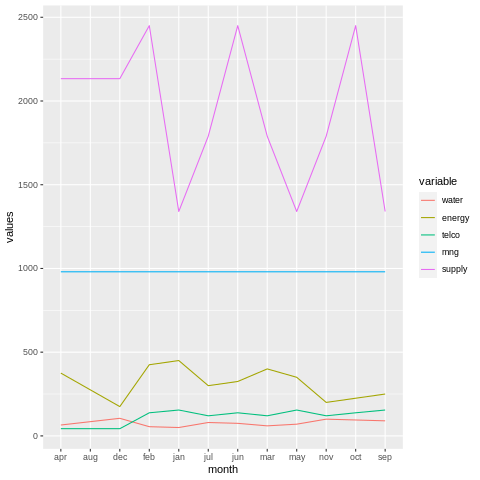

In [29]:
%%R
ggplot(data=utility_m,aes(x=month, y=values, group=variable, color = variable) ) +
  geom_line() 

In [30]:
%%R
students_per_course <- grades %>% group_by(Course) %>% summarize(qty = NROW(Course))
students_per_course

# A tibble: 3 × 2
  Course   qty
  <chr>  <int>
1 ADM        5
2 ECO        2
3 LAW        5


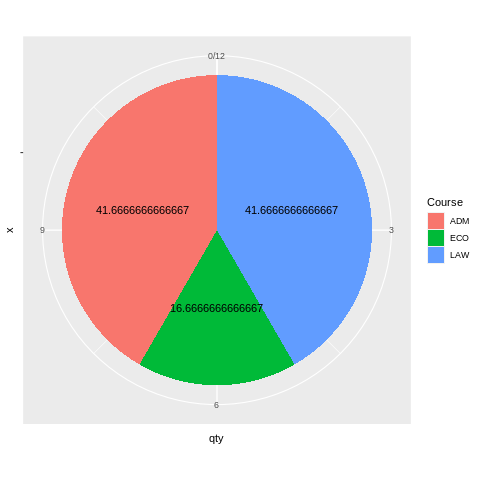

In [31]:
%%R
ggplot(data=students_per_course,aes(x="",y=qty,fill=Course)) + 
  geom_bar(stat='identity') +
  coord_polar("y") +
  geom_text(aes(label = qty/sum(qty)*100),position=position_stack(vjust = 0.5) )